
<div>
<font size = "7">Hamid Rezaei 9923031</font>
</div>

<div dir=rtl>
<font size = "6">قبل از هر کاری، با استفاده از مسیری که در خط پایین ذکر شده، یک کپی از این نوتبوک در گوگل درایو خودتان بسازید و تمرین را در آن نسخه حل کنید.</font>

</div>

<div>
<font size = "4">
File --> Save a copy in Drive
</font>
</div>

# Question 0: Run the cell below without modifying it.

<div dir=rtl>
<font size = "6">بدون اعمال هیچ تغییری در بلوک زیر، آن را اجرا کنید.</font>
</div>

In [ ]:
#@title Downloading the necessary data for this homework
!pip install pydicom
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37' -O 'HW1_data.zip'
!unzip HW1_data.zip

--2023-11-08 17:03:20--  https://drive.google.com/uc?export=download&id=1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37
Resolving drive.google.com (drive.google.com)... 173.194.195.101, 173.194.195.138, 173.194.195.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.195.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-2g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9ikbu4h7ra36gc2aa9vfhca9l48mfgbd/1699462950000/16242004942888370848/*/1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37?e=download&uuid=fdcba849-11aa-4c21-913e-9edc68a631b6 [following]
--2023-11-08 17:03:21--  https://doc-0k-2g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9ikbu4h7ra36gc2aa9vfhca9l48mfgbd/1699462950000/16242004942888370848/*/1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37?e=download&uuid=fdcba849-11aa-4c21-913e-9edc68a631b6
Resolving doc-0k-2g-docs.googleusercontent.com (doc-0k-2g-docs.googleusercontent.com)... 74.125.201.132, 2

# The Imports

In [ ]:
###
# ENTER YOUR CODE HERE.
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pydicom as dicom

###

# Any Helper Functions

<div dir=rtl>
<font size = "6">در صورت نیاز یا برای راحتی خودتان می‌توانید توابع کمکی‌ای (مثلا برای عملیات‌های پر تکرار) این جا تعریف کنید.</font>
</div>

In [ ]:
###
# ENTER YOUR CODE HERE.
def imshow(
    img,
    title: str,
    cmap: str = 'gray',
    vmin: int = 0,
    vmax: str = 255
):
    fig, ax = plt.subplots()
    ax.imshow(img, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_title(title, color='white', fontweight='bold', backgroundcolor='green')

    plt.axis('off')
    plt.show()

###

# Question 4: (20%)

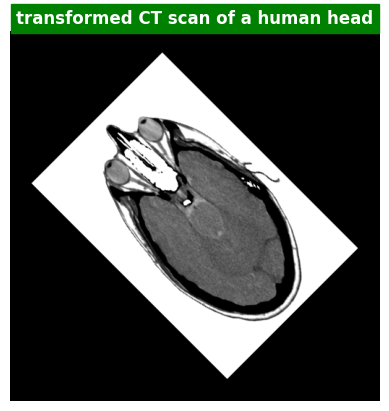

In [21]:
#@title Q4 - Part 1 (25%)
###
# ENTER YOUR CODE HERE.
head_img = cv.imread("transformed.png", cv.IMREAD_GRAYSCALE)
imshow(img=head_img, title="transformed CT scan of a human head")

###

Q4 - Part 1 Explanation:
<div dir=rtl>
<font size = "5">
{
    همانطور که مشخص است تصویر نسبت به تصویر ابتدایی چرخانده شده است
تصویر به اصطلاح rotate شده است.
و سپس تصویر انتقال یافته و اسکیل شده و کوچک است و این باعث شده است برخی مکان های تصویر سیاه باشند.

ماتریس تبدیل اول Rotation  است و
ماتریس تبدیل دوم Translation است
ماتریس تبدیل سوم Scaling است   
}
</font><br />
</div>

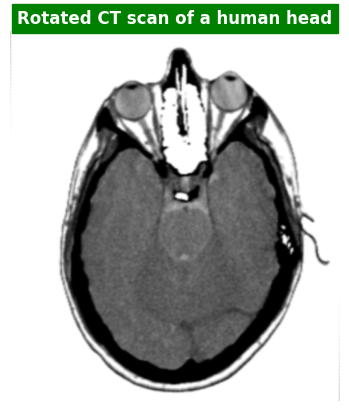

In [22]:
#@title Q4 - Part 2 (40%)
###
# ENTER YOUR CODE HERE.
rows, cols = head_img.shape

# By Rotation Transformation rotate image to original position
rotation_matrix = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0), 314.7, 1)
rotated_img = cv.warpAffine(head_img, rotation_matrix, (cols, rows))
trans_img = cv.warpAffine(rotated_img, np.float32([[1,0,-129],[0,1,-65]]),(254,380))
resized_head_img = cv.resize(trans_img, None, fx=2, fy=1.5, interpolation=cv.INTER_LINEAR)
imshow(resized_head_img, "Rotated CT scan of a human head")

###

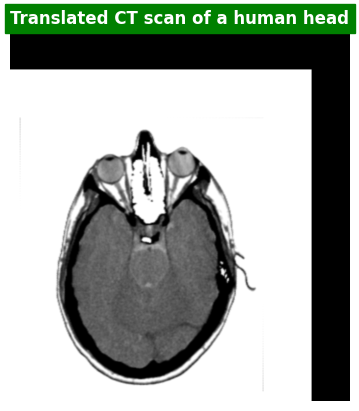

In [23]:
#@title Q4 - Part 3 (35%)
###
# ENTER YOUR CODE HERE.
padding_img = cv.copyMakeBorder(src=resized_head_img, top=100, bottom=100, left=100, right=100, borderType=cv.BORDER_CONSTANT, value=255)

rows,cols = padding_img.shape
translation_matrix = np.float32([[1, 0, -80],[0, 1, 80]])
trans_img = cv.warpAffine(padding_img, translation_matrix, (cols,rows))

imshow(trans_img, "Translated CT scan of a human head")
###

# Question 5: (20%)

Image Data Type: uint8, Image Shape: (512, 512)



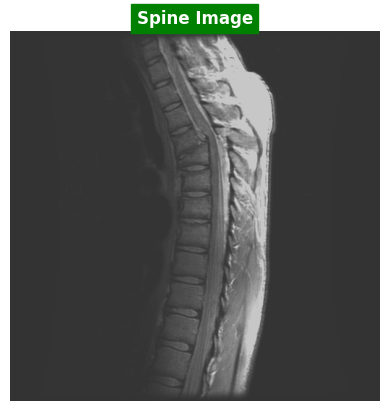

In [24]:
#@title Q5 - Part 1 (10%)
###
# ENTER YOUR CODE HERE.
spine_img = cv.imread("spine.tif", cv.IMREAD_GRAYSCALE)
print(f"Image Data Type: {spine_img.dtype}, Image Shape: {spine_img.shape}\n")

spine_img = spine_img.astype(np.float64)
imshow(img=spine_img, title="Spine Image")
###

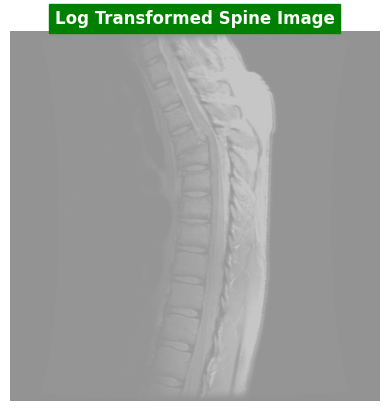

In [46]:
#@title Q5 - Part 2 (10%)
###
# ENTER YOUR CODE HERE.
def log_transform(img):
    intensity_level = np.amax(img)
    c = (intensity_level - 1)/np.log(intensity_level)
    s = c * np.log(1 + img)
    return s

log_trans_img = log_transform(spine_img)
imshow(img=log_trans_img, title="Log Transformed Spine Image")

###

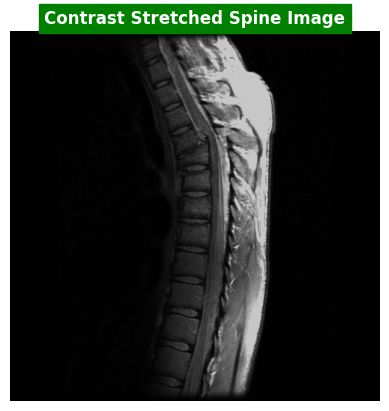

In [26]:
#@title Q5 - Part 3 (30%)
###
# ENTER YOUR CODE HERE.
def contrast_stretching(img):
    low = img.min()
    high = img.max()
    intensity_level = np.amax(img)
    s = intensity_level * (img - low) / (high - low)
    return s

contrast_str_img = contrast_stretching(img=spine_img)
imshow(contrast_str_img, "Contrast Stretched Spine Image")

###

(-0.5, 511.5, 511.5, -0.5)

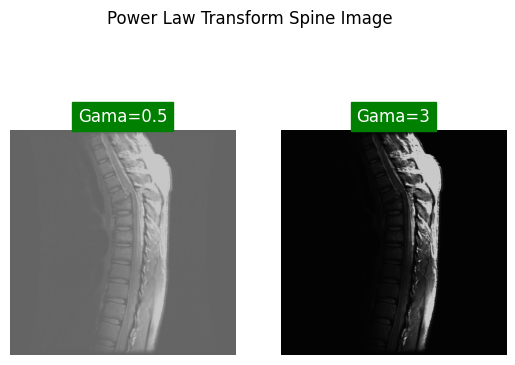

In [27]:
#@title Q5 - Part 4 (15%)
###
# ENTER YOUR CODE HERE.
def power_law_transform(img, gama):
    intensity_level = np.amax(img)
    c = np.float_power((intensity_level - 1), (1 - gama))
    s = c * np.power(img, gama)
    return s

power_law_transform_img1 = power_law_transform(spine_img, gama=0.5)
power_law_transform_img2 = power_law_transform(spine_img, gama=3)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Power Law Transform Spine Image')
ax1.imshow(power_law_transform_img1, cmap='gray', vmin=0, vmax=255)
ax1.set_title("Gama=0.5", color='white', backgroundcolor='green')
ax1.axis('off')

ax2.imshow(power_law_transform_img2, cmap='gray', vmin=0, vmax=255)
ax2.set_title("Gama=3", color='white', backgroundcolor='green')
ax2.axis('off')

###

Text(0.5, 1.0, 'hist: law:3')

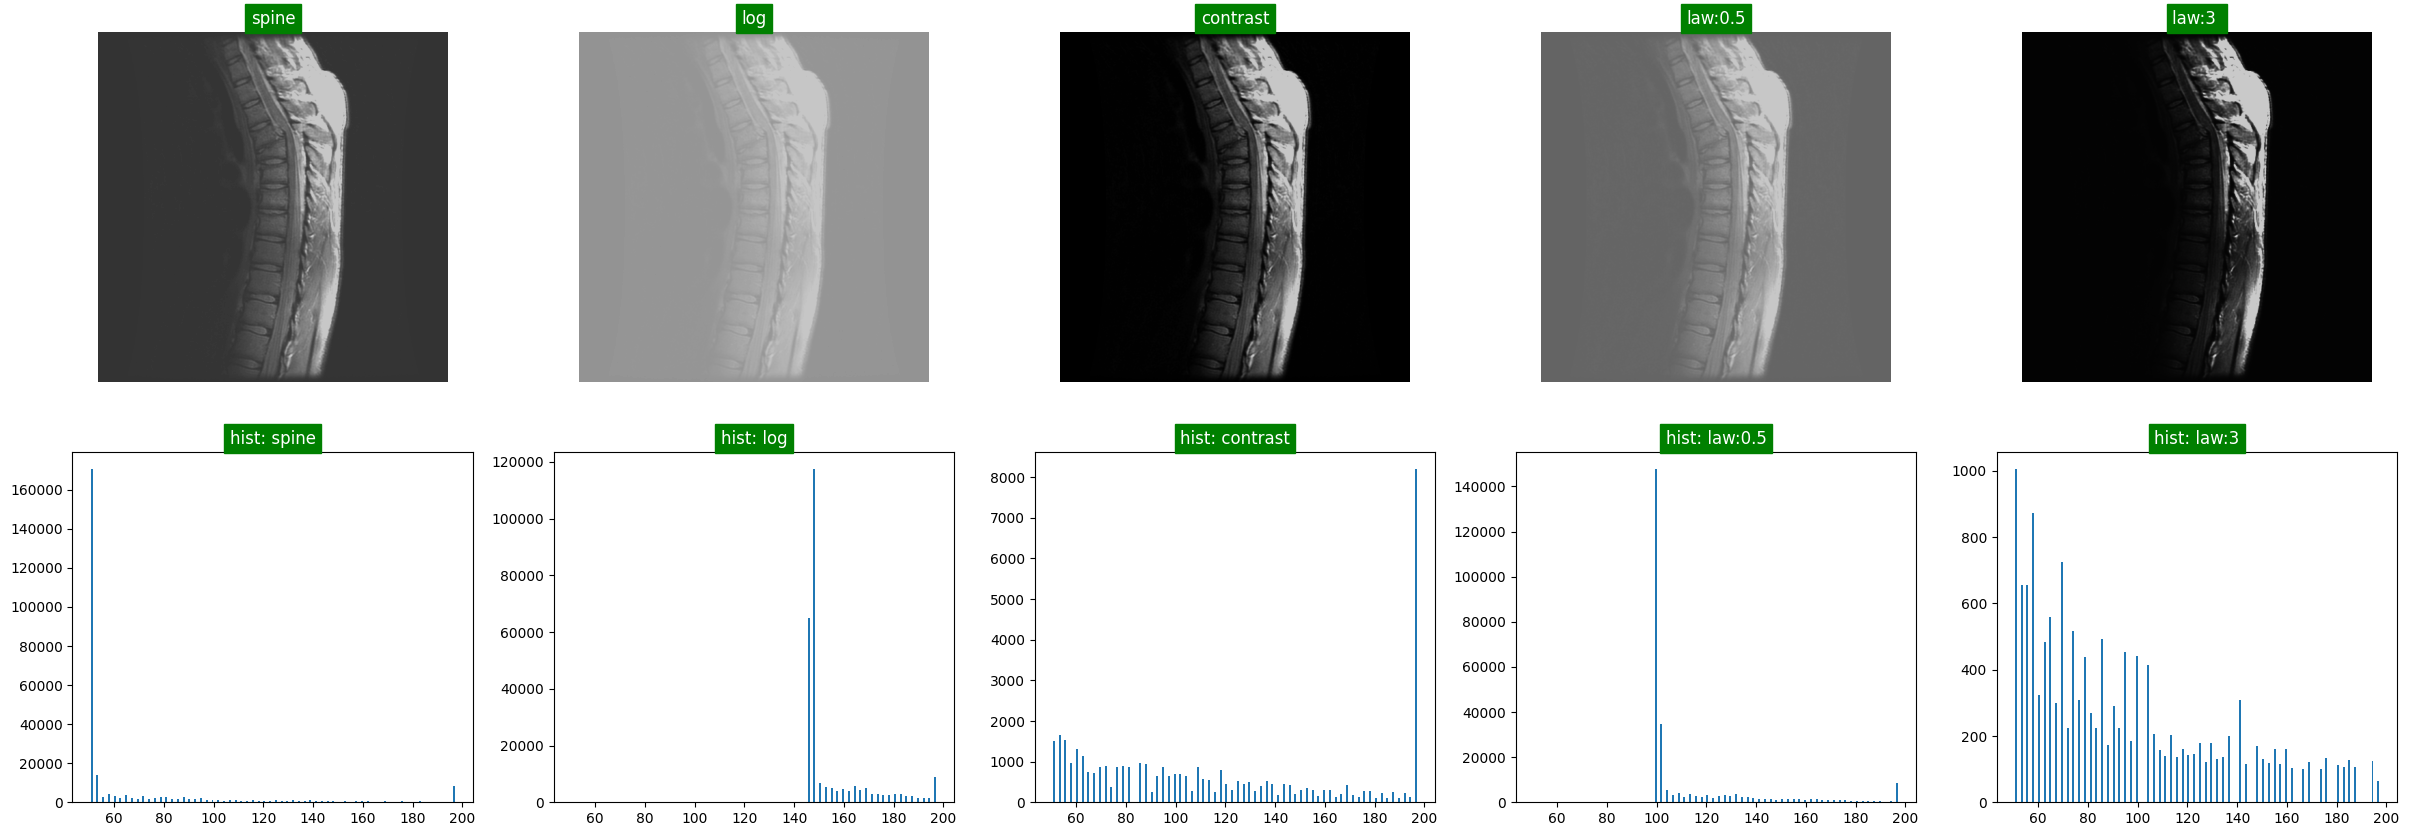

In [28]:
#@title Q5 - Part 5 (15%)
###
# ENTER YOUR CODE HERE.

cmap = 'gray'
vmin, vmax = 0, 255
max_range, min_range = np.amax(spine_img), np.amin(spine_img)
bar_width = 0.8
plt.figure(figsize=(30,10))

#===============================================================================
plt.subplot(2, 5, 1)
plt.imshow(spine_img, cmap=cmap, vmin=vmin, vmax=vmax)
plt.title('spine', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(2, 5, 6)
spine_img_hist, bins = np.histogram(spine_img, bins=256//4, range=(min_range, max_range))
plt.bar(bins[:-1], spine_img_hist, width=bar_width)
plt.title('hist: spine', color='white', backgroundcolor='green')

#===============================================================================
plt.subplot(2, 5, 2)
plt.imshow(log_trans_img, cmap=cmap, vmin=vmin, vmax=vmax)
plt.title('log', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(2, 5, 7)
log_trans_img_hist, bins = np.histogram(log_trans_img, bins=256//4, range=(min_range, max_range))
plt.bar(bins[:-1], log_trans_img_hist, width=bar_width)
plt.title('hist: log', color='white', backgroundcolor='green')

#===============================================================================
plt.subplot(2, 5, 3)
plt.imshow(contrast_str_img, cmap=cmap, vmin=vmin, vmax=vmax)
plt.title('contrast', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(2, 5, 8)
contrast_str_img_hist, bins = np.histogram(contrast_str_img, bins=256//4, range=(min_range, max_range))
plt.bar(bins[:-1], contrast_str_img_hist, width=bar_width)
plt.title('hist: contrast', color='white', backgroundcolor='green')

#===============================================================================
plt.subplot(2, 5, 4)
plt.imshow(power_law_transform_img1, cmap=cmap, vmin=vmin, vmax=vmax)
plt.title('law:0.5', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(2, 5, 9)
power_law_transform_img1_hist, bins = np.histogram(power_law_transform_img1, bins=256//4, range=(min_range, max_range))
plt.bar(bins[:-1], power_law_transform_img1_hist, width=bar_width)
plt.title('hist: law:0.5', color='white', backgroundcolor='green')

#===============================================================================
plt.subplot(2, 5, 5)
plt.imshow(power_law_transform_img2, cmap=cmap, vmin=vmin, vmax=vmax)
plt.title('law:3 ', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(2, 5, 10)
power_law_transform_img2_hist, bins = np.histogram(power_law_transform_img2, bins=256//4, range=(min_range, max_range))
plt.bar(bins[:-1], power_law_transform_img2_hist, width=bar_width)
plt.title('hist: law:3', color='white', backgroundcolor='green')

###

Q5 - Part 6 Explanation (20%):
<div dir=rtl>
<font size = "5">{
    با اعمال لاگ پیکسل ها با شدت کم نسبت به پیکسل ها با شدت زیاد افزایش بیشتری می یابند با توجه به تصویر میتوان پی برد لاگ کانتراست تصویر را کم می کند و  contrast streching  برعکس عمل میکند یعنی مقدار کنتراست را افزایش می دهد

تابع power اگر توان گاما بزرگ تر از یک باشد کنتراست را افزایش می دهد در غیر اینصورت تصویر را روشن تر میکند

}</font><br />
</div>

# Question 6: (35%)

Image Data Type: uint8, Image Shape: (706, 320)



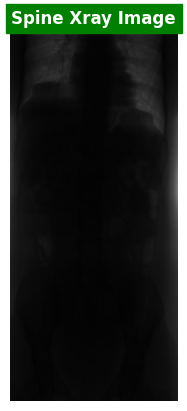

In [29]:
#@title Q6 - Part 1 (5%)
###
# ENTER YOUR CODE HERE.
spineXray_img = cv.imread("spineXray.tif", cv.IMREAD_GRAYSCALE)
print(f"Image Data Type: {spineXray_img.dtype}, Image Shape: {spineXray_img.shape}\n")

imshow(img=spineXray_img, title="Spine Xray Image")
###

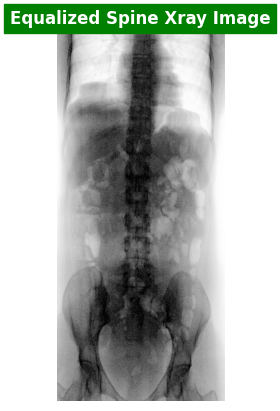

In [30]:
#@title Q6 - Part 2 (5%)
###
# ENTER YOUR CODE HERE.
hist_eql_img = cv.equalizeHist(spineXray_img)
imshow(hist_eql_img, "Equalized Spine Xray Image")

###

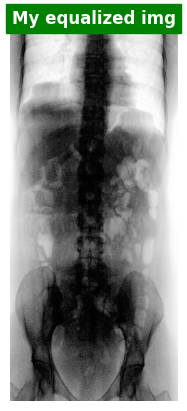

In [53]:
#@title Q6 - Part 3 (25%)
###
# ENTER YOUR CODE HERE.
def equalize_hist(img):
    intensity_level = 2 ** (img.itemsize * 8)

    M, N = img.shape
    img_hist, bins = np.histogram(img, bins=intensity_level, range=(0, intensity_level))

    s = np.zeros(img_hist.shape)
    for k in range(intensity_level):
        s[k] = ((intensity_level-1)/(M * N)) * np.sum(img_hist[0:k])

    image = s[img]

    return image

equalize_img_hist = equalize_hist(spineXray_img)
imshow(equalize_img_hist, "My equalized img")

###

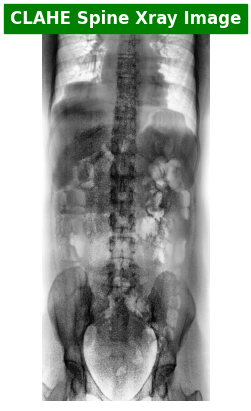

In [55]:
#@title Q6 - Part 4 (20%)
###
# ENTER YOUR CODE HERE.
clahe = cv.createCLAHE(clipLimit=50.0, tileGridSize=(5,5))
spineXray_img_clahe = clahe.apply(spineXray_img)
imshow(spineXray_img_clahe, "CLAHE Spine Xray Image")

###

Text(0.5, 1.0, 'Te-img:cdf')

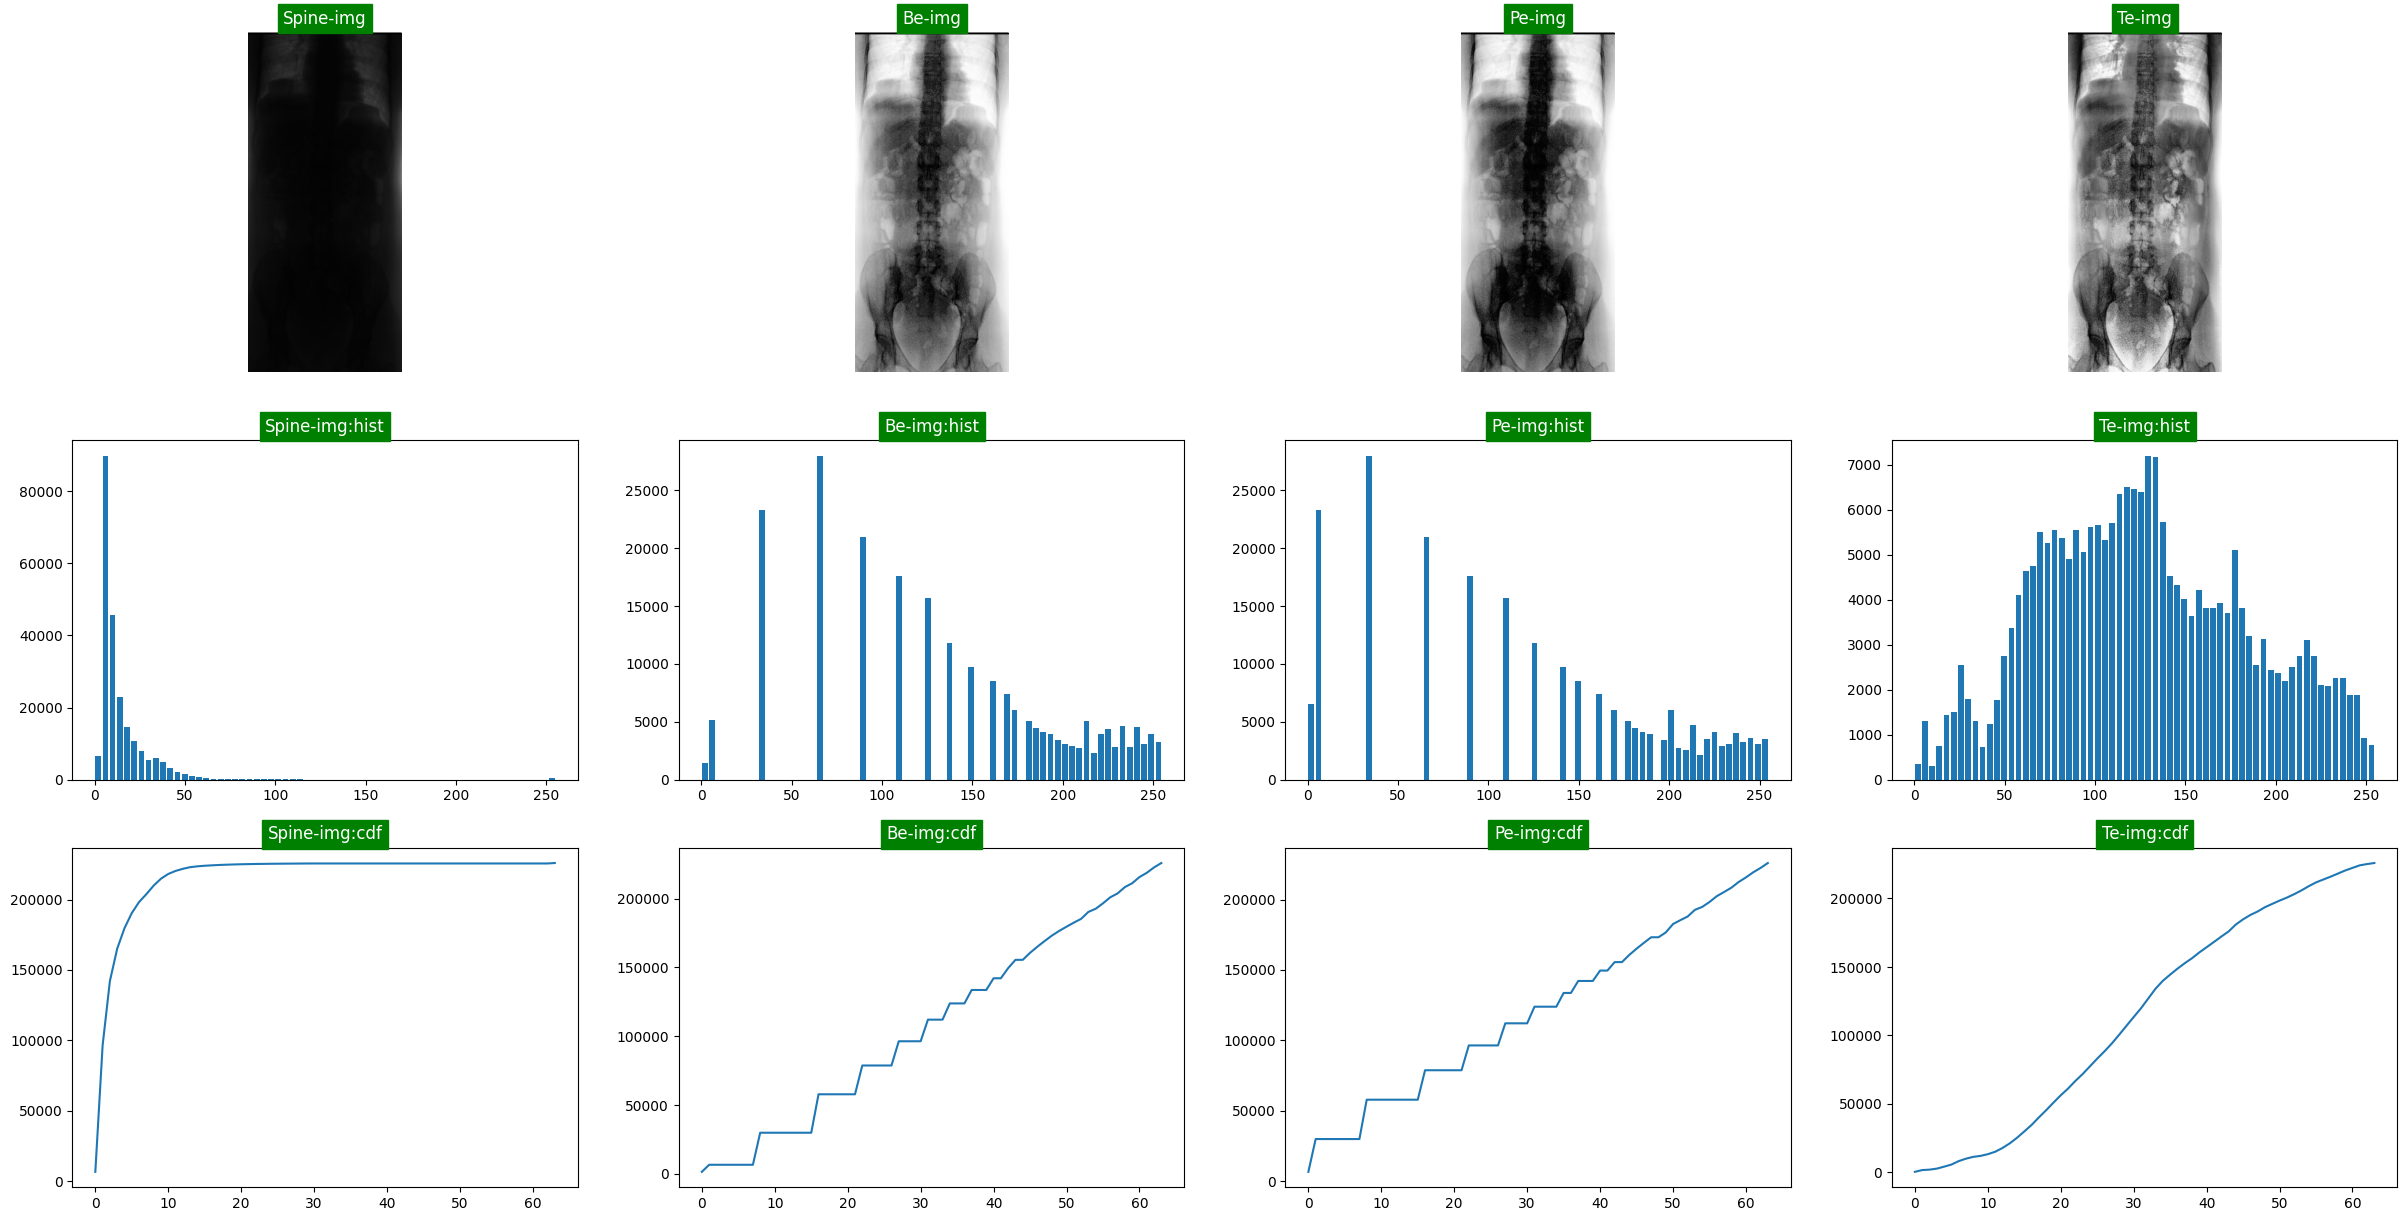

In [67]:
#@title Q6 - Part 5 (10%)
###
# ENTER YOUR CODE HERE.
bar_width = 0.8
cmap = 'gray'
vmin, vmax = 0, 255
max_range, min_range = np.amax(spineXray_img), np.amin(spineXray_img)
bar_width = 0.8
plt.figure(figsize=(30,15))

#===============================================================================

plt.subplot(3, 4, 1)
plt.imshow(spineXray_img, cmap="gray", vmin=vmin, vmax=vmax)
plt.title('Spine-img', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(3, 4, 5)
spineXray_img_hist, bins = np.histogram(spineXray_img, bins=256//4, range=(min_range, max_range))
histData=plt.hist(spineXray_img.ravel(), bins=bins, rwidth=bar_width)
plt.title('Spine-img:hist', color='white', backgroundcolor='green')


plt.subplot(3, 4, 9)
plt.plot(np.cumsum(histData[0]))
plt.title('Spine-img:cdf', color='white', backgroundcolor='green')

#===============================================================================

plt.subplot(3, 4, 2)
plt.imshow(hist_eql_img, cmap="gray", vmin=vmin, vmax=vmax)
plt.title('Be-img', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(3, 4, 6)
hist_eql_img_hist, bins = np.histogram(hist_eql_img, bins=256//4, range=(min_range, max_range))
histData=plt.hist(hist_eql_img.ravel(), bins=bins, rwidth=bar_width)
plt.title('Be-img:hist', color='white', backgroundcolor='green')


plt.subplot(3, 4, 10)
plt.plot(np.cumsum(histData[0]))
plt.title('Be-img:cdf', color='white', backgroundcolor='green')

#===============================================================================

plt.subplot(3, 4, 3)
plt.imshow(equalize_img_hist, cmap="gray", vmin=vmin, vmax=vmax)
plt.title('Pe-img', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(3, 4, 7)
hist, bins = np.histogram(equalize_img_hist, bins=256//4, range=(min_range, max_range))
histData=plt.hist(equalize_img_hist.ravel(), bins=bins, rwidth=bar_width)
plt.title('Pe-img:hist', color='white', backgroundcolor='green')


plt.subplot(3, 4, 11)
plt.plot(np.cumsum(histData[0]))
plt.title('Pe-img:cdf', color='white', backgroundcolor='green')

#===============================================================================

plt.subplot(3, 4, 4)
plt.imshow(spineXray_img_clahe, cmap="gray", vmin=vmin, vmax=vmax)
plt.title('Te-img', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(3, 4, 8)
hist, bins = np.histogram(spineXray_img_clahe, bins=256//4, range=(min_range, max_range))
histData=plt.hist(spineXray_img_clahe.ravel(), bins=bins, rwidth=bar_width)
plt.title('Te-img:hist', color='white', backgroundcolor='green')


plt.subplot(3, 4, 12)
plt.plot(np.cumsum(histData[0]))
plt.title('Te-img:cdf', color='white', backgroundcolor='green')

###

Q6 - Part 6 Explanation (10%):
<div dir=rtl>
<font size = "5">{
    همانطور که مشخص است تصویر اول داری پیکسل هایی با شدت پایین و نزدیک هم است و نمودار هیستوگرام آن بین صفر تا پنجاه پخش شده است و نمودار توضیع تجمعی آن به سرعت بالا میرود اما در تصویر دوم و سوم که هیستوگرام آنها برابر سازی شده است همانطور که مشاهده میشود شدت پیکسل ها بین صفر تا دویست و پنجاه و شش پخش شده است و نمودار توضیع تجمعی آن به آرامی افزایش میابد و در آخر در نمودار انتهایی همانطور که مشخص است شدت ها برخلاف تصاویر دوم و سوم بدون پراکندگی پخش شده اند و نمودار توضیع تجمعی آن نیز صاف تر است.
}</font><br />
</div>

Text(0.5, 1.0, 'Te-img:cdf')

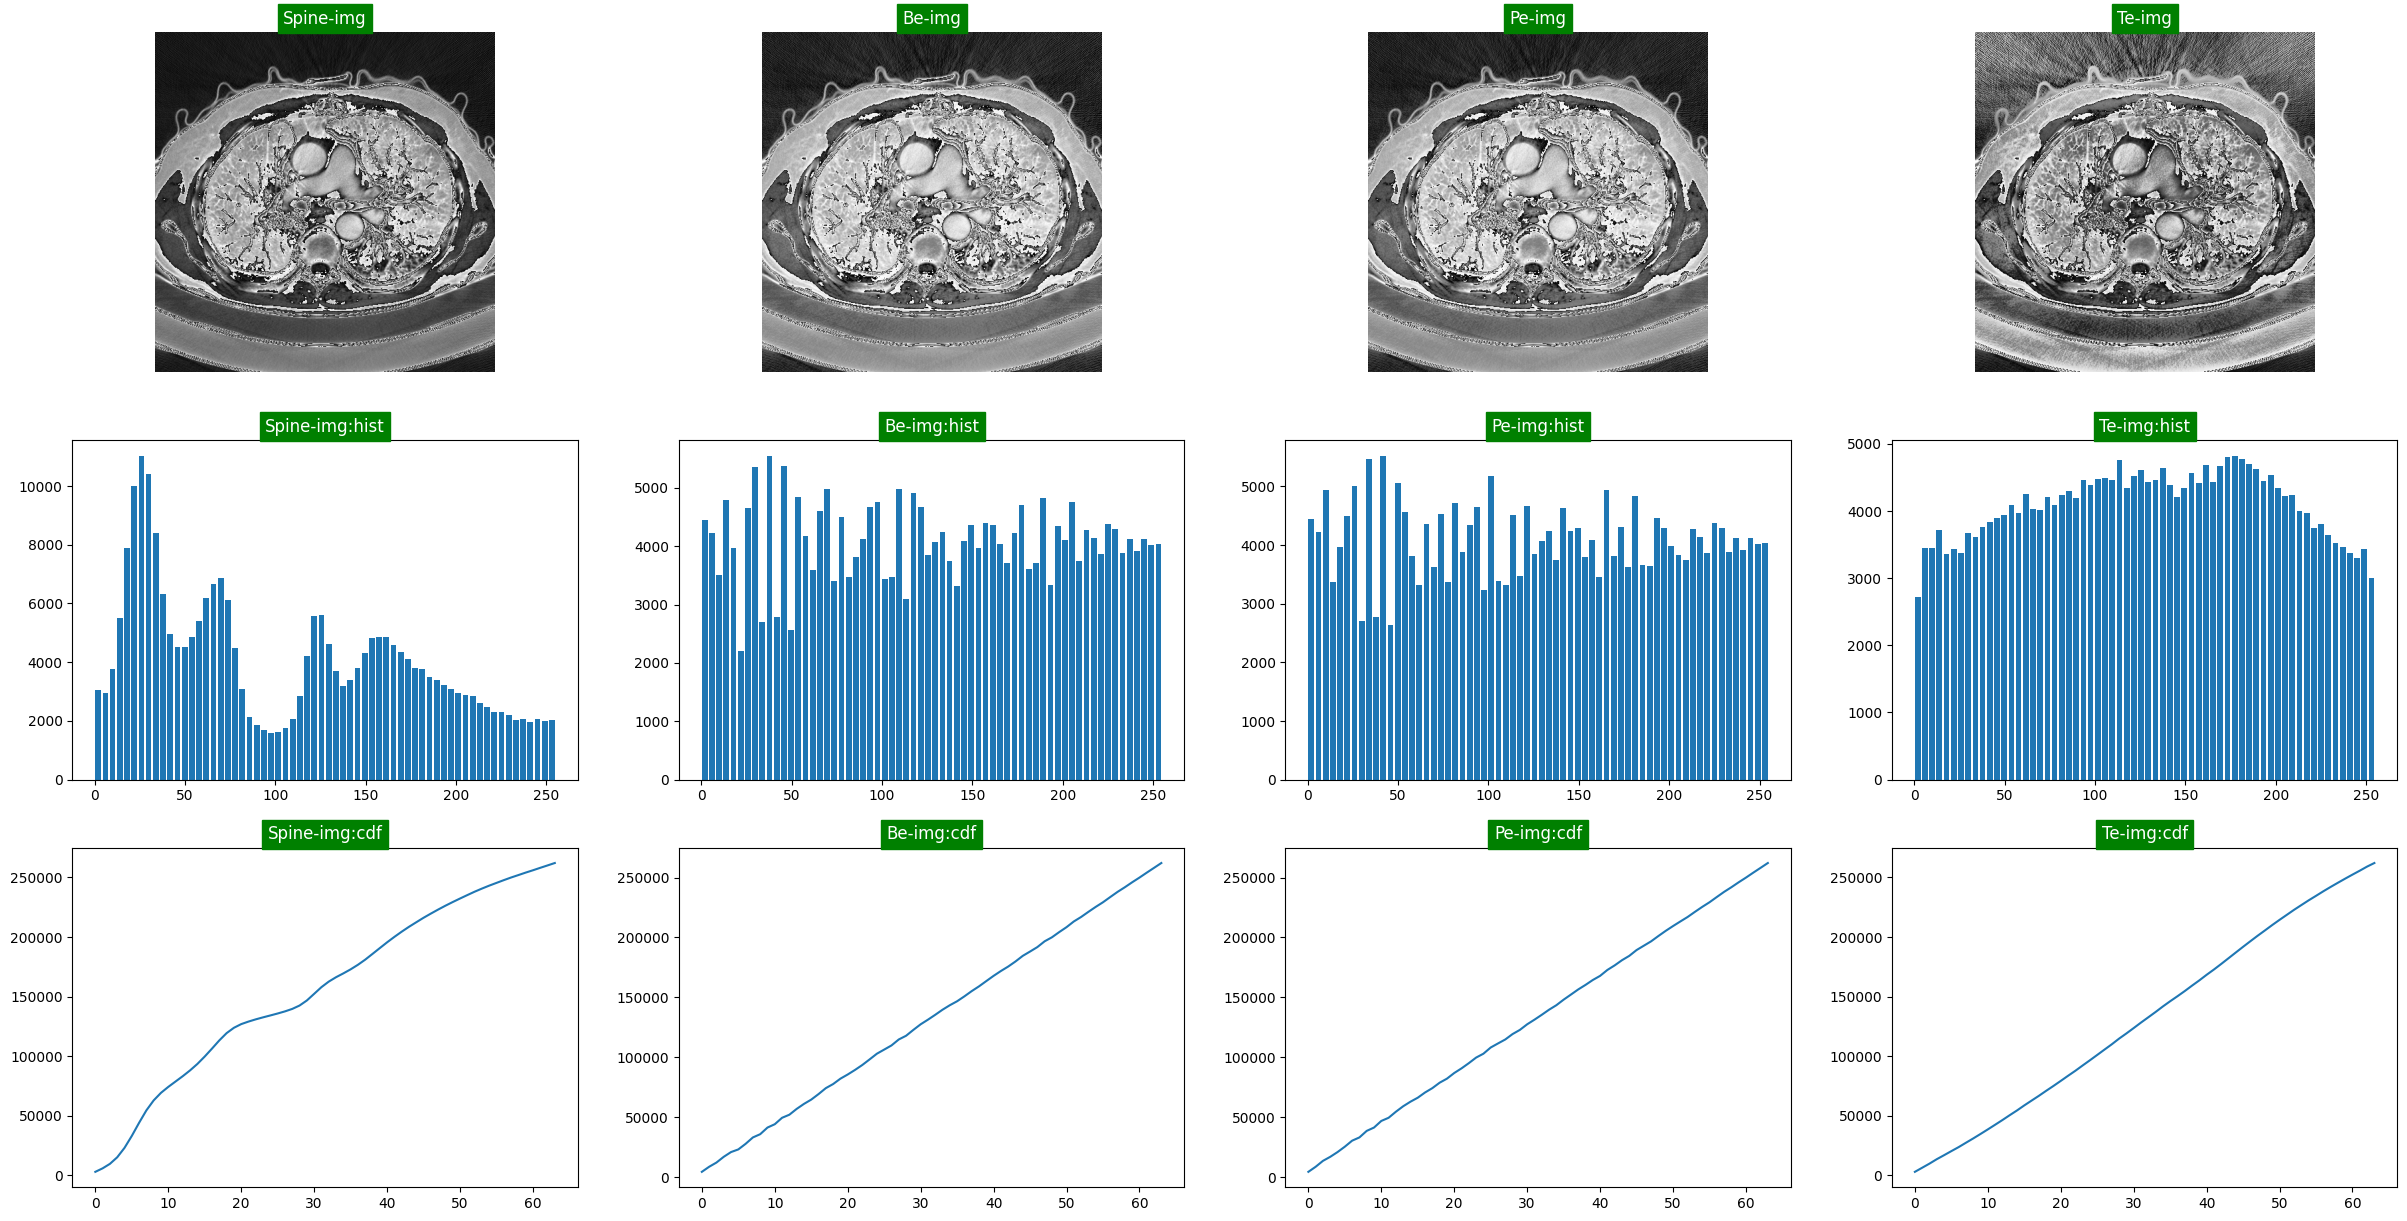

In [73]:
#@title Q6 - Part 7 (25%)
###
# ENTER YOUR CODE HERE.
ds = dicom.dcmread('file.dcm')
# ds
dicomImg = np.uint8(np.array(ds.pixel_array))

bar_width = 0.8
cmap = 'gray'
vmin, vmax = 0, 255
max_range, min_range = np.amax(dicomImg), np.amin(dicomImg)
bar_width = 0.8
plt.figure(figsize=(30,15))

#===============================================================================

plt.subplot(3, 4, 1)
plt.imshow(dicomImg, cmap="gray", vmin=vmin, vmax=vmax)
plt.title('Spine-img', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(3, 4, 5)
hist, bins = np.histogram(dicomImg, bins=256//4, range=(min_range, max_range))
histData=plt.hist(dicomImg.ravel(), bins=bins, rwidth=bar_width)
plt.title('Spine-img:hist', color='white', backgroundcolor='green')


plt.subplot(3, 4, 9)
plt.plot(np.cumsum(histData[0]))
plt.title('Spine-img:cdf', color='white', backgroundcolor='green')

#===============================================================================

Bimg = cv.equalizeHist(dicomImg)
plt.subplot(3, 4, 2)
plt.imshow(Bimg, cmap="gray", vmin=vmin, vmax=vmax)
plt.title('Be-img', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(3, 4, 6)
hist, bins = np.histogram(Bimg, bins=256//4, range=(min_range, max_range))
histData=plt.hist(Bimg.ravel(), bins=bins, rwidth=bar_width)
plt.title('Be-img:hist', color='white', backgroundcolor='green')


plt.subplot(3, 4, 10)
plt.plot(np.cumsum(histData[0]))
plt.title('Be-img:cdf', color='white', backgroundcolor='green')

#===============================================================================

Pimg = equalize_hist(dicomImg)
plt.subplot(3, 4, 3)
plt.imshow(Pimg, cmap="gray", vmin=vmin, vmax=vmax)
plt.title('Pe-img', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(3, 4, 7)
hist, bins = np.histogram(Pimg, bins=256//4, range=(min_range, max_range))
histData=plt.hist(Pimg.ravel(), bins=bins, rwidth=bar_width)
plt.title('Pe-img:hist', color='white', backgroundcolor='green')


plt.subplot(3, 4, 11)
plt.plot(np.cumsum(histData[0]))
plt.title('Pe-img:cdf', color='white', backgroundcolor='green')

#===============================================================================

Timg = cv.createCLAHE(clipLimit=50.0, tileGridSize=(5,5)).apply(dicomImg)
plt.subplot(3, 4, 4)
plt.imshow(Timg, cmap="gray", vmin=vmin, vmax=vmax)
plt.title('Te-img', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(3, 4, 8)
hist, bins = np.histogram(Timg, bins=256//4, range=(min_range, max_range))
histData=plt.hist(Timg.ravel(), bins=bins, rwidth=bar_width)
plt.title('Te-img:hist', color='white', backgroundcolor='green')


plt.subplot(3, 4, 12)
plt.plot(np.cumsum(histData[0]))
plt.title('Te-img:cdf', color='white', backgroundcolor='green')

###

Q6 - Part 7 Explanation:
<div dir=rtl>
<font size = "5">{
    در تصویر اصلی شدت پیکسل ها بین صفر و دویست و پنجاه و پنج است و برای همین در مراحل بعدی مقدار کنتراست تصویر تغییر زیادی نمیکند اما باید توجه کرد شدت پیکسل ها یکدست تر شده است و این موضوع از نمودارهای هیستوگرام نیز مشخص است و نکته درگر که باید توجه کرد این است که در مراحل یکسان سازی هیستوگرام نمودار توضیع تجمعی صاف تر میشود.
}</font><br />
</div>

<div dir=rtl>
<font size = "5">	** توجه داشتید باشید کولب خود را بصورت viewer به اشتراک بگذارید. (بالا سمت راست دکمه Share قرار دارد که موقع فشردن آن یک صفحه باز می‌شود و گزینه‌ای که بصورت پیشفرض نوشته restricted را تغییر دهید)

</font><br />
</div>


<div dir=rtl>
<font size = "5">
**	حتماً توجه کنید که در هنگام تحویل و آخرین ویرایش روی کد خود، خروجی همه‌ی بلاک‌ها، خروجی درست و نهایی همان بلاک باشد. (بطور مثال ممکن است تغییری در کد بدهید و رویت کنید که خروجی درست نیست و فقط تغییرتان را undo کرده ولی دوباره اجرایش نکنید و خروجی سلول همان خروجی دوم که جواب اشتباهی بود بماند).

</font><br />
</div>


<div dir=rtl>
<font size = "5">	**	نکته مهم: لطفاً بعد از تحویل تمرین دیگر کد گوگل کولب خود را باز نکنید و حتی کوچکترین تغییری (حتی در حد ایجاد یک space) در آن ندهید.(چرا که تاریخ آخرین ویرایش آن تغییر کرده و برای مصحح محترم قابل احراز نیست که این کد شما چه زمانی نوشته شده است (از نظر موعد قابل پذیرش برای تحویل) و بخش کدنویسی آن تمرین از شما پذیرفته نخواهد شد)

</font><br />
</div>


<div dir=rtl>
<font size = "5">	نحوه ارسال تمارین: PDF حل تمارین تشریحی به همراه کدهای نوشته شده (اشتراک لینک گوگل کولب شما (داخل Notepad و ابتدای گزارش تشریحی) + تحویل pdf پرینت آن + دانلود .ipynb آن) در قالب یک فایل فشرده zip به اسم HW1_Num باشند که Num شماره دانشجویی شما است مانند HW1_400133001 و فقط از طریق سامانه ی مدیریت یادگیری Courses ارسال بفرمایید. با آرزوی موفقیت برای شما  
</font><br />
</div>
